In [47]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

In [48]:
df = pd.read_csv("/content/Bank-Customer-Attrition-Insights-Data.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [53]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [49]:
def summary_statistics(df, columns):
    summary = {}
    for col in columns:
        summary[col] = {
            "mean": np.mean(df[col]),
            "median": np.median(df[col]),
            "std_dev": np.std(df[col]),
            "skewness": skew(df[col]),
            "kurtosis": kurtosis(df[col])
        }
    return pd.DataFrame(summary).T

1. What are the summary statistics (mean, median, standard deviation, skewness, and kurtosis) for key numerical variables such as balance, credit score, and transaction count?


In [50]:
numerical_columns = ["Balance", "CreditScore","EstimatedSalary"]
summary_stats = summary_statistics(df, numerical_columns)
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
                           mean      median       std_dev  skewness  kurtosis
Balance           76485.889288   97198.540  62394.285254 -0.141088 -1.489267
CreditScore         650.528800     652.000     96.648466 -0.071596 -0.426113
EstimatedSalary  100090.239881  100193.915  57507.617221  0.002085 -1.181528


In [51]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


2. What is the distribution of customers by gender, geography, and age?


In [54]:
gender_distribution = df['Gender'].value_counts()
geography_distribution = df['Geography'].value_counts()
age_distribution = df['Age'].value_counts(bins=10, sort=False)


print("\nGender Distribution:\n", gender_distribution)
print("\nGeography Distribution:\n", geography_distribution)
print("\nAge Distribution:\n", age_distribution)


Gender Distribution:
 Gender
Male      5457
Female    4543
Name: count, dtype: int64

Geography Distribution:
 Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Age Distribution:
 (17.924999999999997, 25.4]     611
(25.4, 32.8]                  2179
(32.8, 40.2]                  3629
(40.2, 47.6]                  1871
(47.6, 55.0]                   910
(55.0, 62.4]                   441
(62.4, 69.8]                   208
(69.8, 77.2]                   127
(77.2, 84.6]                    20
(84.6, 92.0]                     4
Name: count, dtype: int64


<ipython-input-55-ff62944c859f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'], palette='pastel')


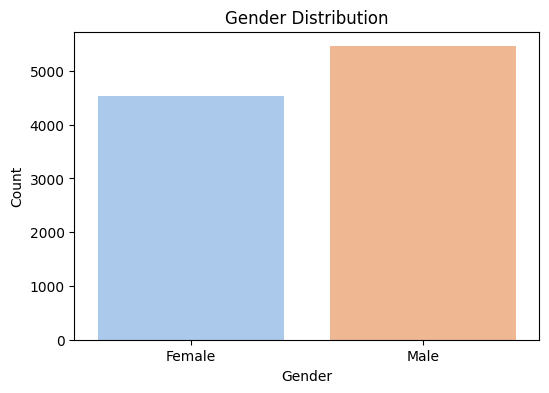

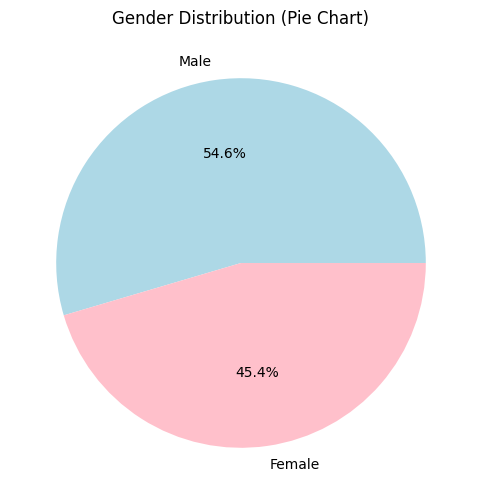

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df['Gender'], palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot.pie(autopct="%1.1f%%", colors=['lightblue', 'pink'])
plt.title("Gender Distribution (Pie Chart)")
plt.ylabel("")
plt.show()


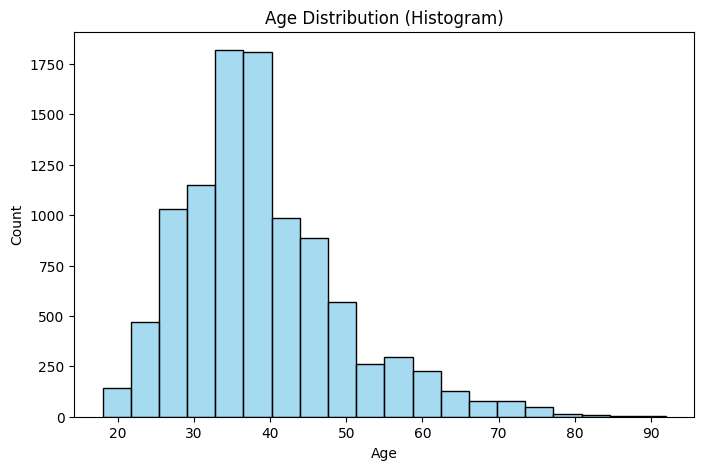

<ipython-input-56-5bc8b63ee4e9>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True, color='green')


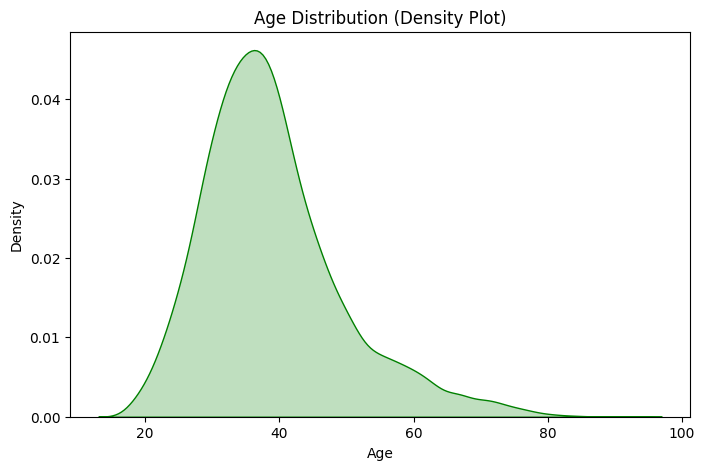

In [56]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=False, color='skyblue')
plt.title("Age Distribution (Histogram)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.kdeplot(df['Age'], shade=True, color='green')
plt.title("Age Distribution (Density Plot)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


<ipython-input-57-e256da0b6791>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Geography'], palette='muted')


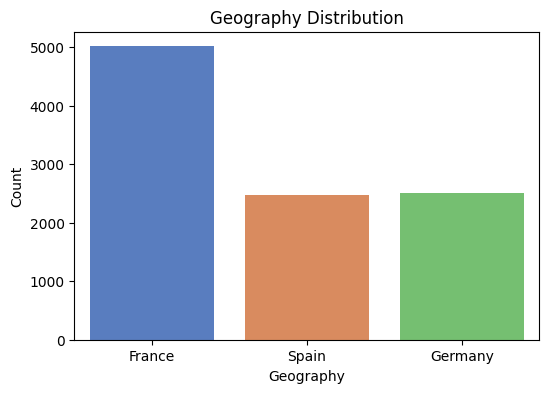

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Geography'], palette='muted')
plt.title("Geography Distribution")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.show()


3. What are the minimum, maximum, and average transaction counts of active vs. inactive customers?


In [60]:

active_customers = df[df['IsActiveMember'] == 1]
inactive_customers = df[df['IsActiveMember'] == 0]

active_summary = {
    "min": active_customers['EstimatedSalary'].min(),
    "max": active_customers['EstimatedSalary'].max(),
    "average": active_customers['EstimatedSalary'].mean()
}
inactive_summary = {
    "min": inactive_customers['EstimatedSalary'].min(),
    "max": inactive_customers['EstimatedSalary'].max(),
    "average": inactive_customers['EstimatedSalary'].mean()
}

print("\nActive Customers in Estimated Salary Column:\n", active_summary)
print("\nInactive Customers in Estimated Salary Colummn:\n", inactive_summary)


Active Customers in Estimated Salary Column :
 {'min': 11.58, 'max': 199953.33, 'average': 99452.96589400116}

Inactive Customers in Estimated Salary Colummn :
 {'min': 91.75, 'max': 199992.48, 'average': 100767.20385440298}


1️⃣ Histogram - Estimated Salary for Active vs. Inactive Customers

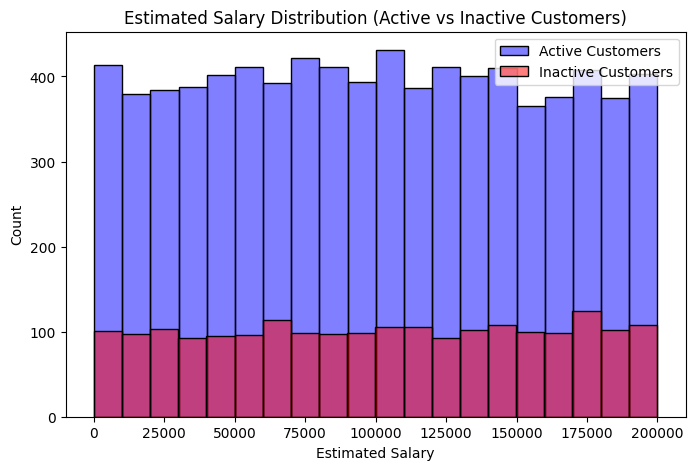

In [69]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Exited'] == 0]['EstimatedSalary'], bins=20, color='blue', alpha=0.5, label="Active Customers")
sns.histplot(df[df['Exited'] == 1]['EstimatedSalary'], bins=20, color='red', alpha=0.5, label="Inactive Customers")
plt.title("Estimated Salary Distribution (Active vs Inactive Customers)")
plt.xlabel("Estimated Salary")
plt.ylabel("Count")
plt.legend()
plt.show()


2️⃣ KDE Plot - Smoothed Density of Estimated Salary

<ipython-input-70-a699a3f805c9>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited'] == 0]['EstimatedSalary'], shade=True, color='blue', label="Active Customers")
<ipython-input-70-a699a3f805c9>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited'] == 1]['EstimatedSalary'], shade=True, color='red', label="Inactive Customers")


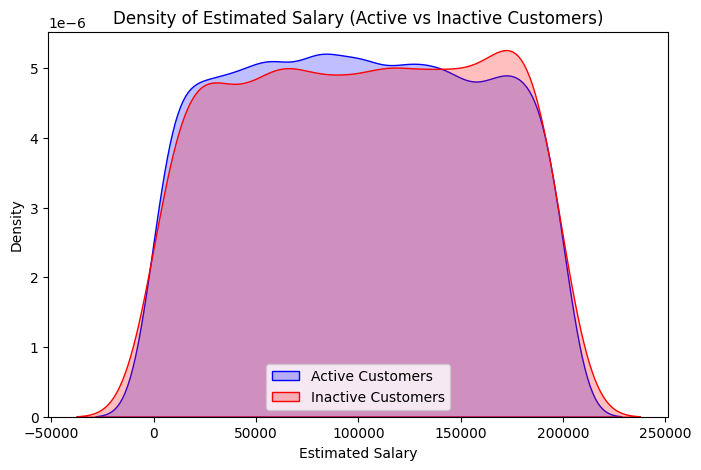

In [70]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['Exited'] == 0]['EstimatedSalary'], shade=True, color='blue', label="Active Customers")
sns.kdeplot(df[df['Exited'] == 1]['EstimatedSalary'], shade=True, color='red', label="Inactive Customers")
plt.title("Density of Estimated Salary (Active vs Inactive Customers)")
plt.xlabel("Estimated Salary")
plt.ylabel("Density")
plt.legend()
plt.show()


3️⃣ Box Plot - Comparing Salary Distributions

<ipython-input-72-60c92839e938>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Exited"].astype(str), y=df["EstimatedSalary"], palette={"0": "blue", "1": "red"}) # Changed the palette keys to strings


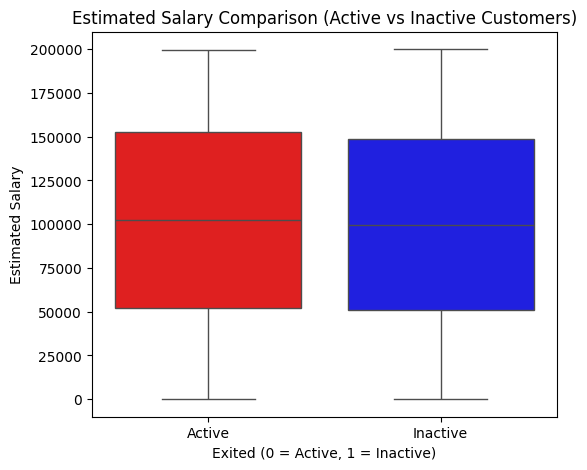

In [72]:
plt.figure(figsize=(6,5))
sns.boxplot(x=df["Exited"].astype(str), y=df["EstimatedSalary"], palette={"0": "blue", "1": "red"})
plt.title("Estimated Salary Comparison (Active vs Inactive Customers)")
plt.xlabel("Exited (0 = Active, 1 = Inactive)")
plt.ylabel("Estimated Salary")
plt.xticks([0, 1], ["Active", "Inactive"])
plt.show()

In [61]:

active_customers = df[df['IsActiveMember'] == 1]
inactive_customers = df[df['IsActiveMember'] == 0]

active_summary = {
    "min": active_customers['Balance'].min(),
    "max": active_customers['Balance'].max(),
    "average": active_customers['Balance'].mean()
}
inactive_summary = {
    "min": inactive_customers['Balance'].min(),
    "max": inactive_customers['Balance'].max(),
    "average": inactive_customers['Balance'].mean()
}

print("\nActive Customers in Balance Column:\n", active_summary)
print("\nInactive Customers in Balance Column:\n", inactive_summary)


Active Customers in Balance Column:
 {'min': 0.0, 'max': 250898.09, 'average': 75875.42214521453}

Inactive Customers in Balance Column:
 {'min': 0.0, 'max': 222267.63, 'average': 77134.37686327078}


In [62]:
from scipy.stats import skew, kurtosis

4. How are variables like credit score, balance, and transaction count related?


In [68]:

correlation_matrix = df[["Balance", "CreditScore","EstimatedSalary"]].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


stayed_customers = df[df['Exited'] == 0]
churned_customers = df[df['Exited'] == 1]

balance_comparison = {
    "Stayed_Avg_Balance": stayed_customers["Balance"].mean(),
    "Churned_Avg_Balance": churned_customers["Balance"].mean()
}
creditscore_comparison = {
    "Stayed_Avg_Salary": stayed_customers["CreditScore"].mean(),
    "Churned_Avg_Salary": churned_customers["CreditScore"].mean()
}
salary_comparison = {
    "Stayed_Avg_Salary": stayed_customers["EstimatedSalary"].mean(),
    "Churned_Avg_Salary": churned_customers["EstimatedSalary"].mean()
}

print("\nBalance Comparison:\n", balance_comparison)
print("\nCreditScore Comparison:\n", creditscore_comparison)
print("\nEstimated Salary Comparison:\n", salary_comparison)



Correlation Matrix:
                   Balance  CreditScore  EstimatedSalary
Balance          1.000000     0.006268         0.012797
CreditScore      0.006268     1.000000        -0.001384
EstimatedSalary  0.012797    -0.001384         1.000000

Balance Comparison:
 {'Stayed_Avg_Balance': 72742.75066314996, 'Churned_Avg_Balance': 91109.47600588812}

CreditScore Comparison:
 {'Stayed_Avg_Salary': 651.8378548103492, 'Churned_Avg_Salary': 645.4146221786065}

Estimated Salary Comparison:
 {'Stayed_Avg_Salary': 99726.85314117056, 'Churned_Avg_Salary': 101509.90878312069}


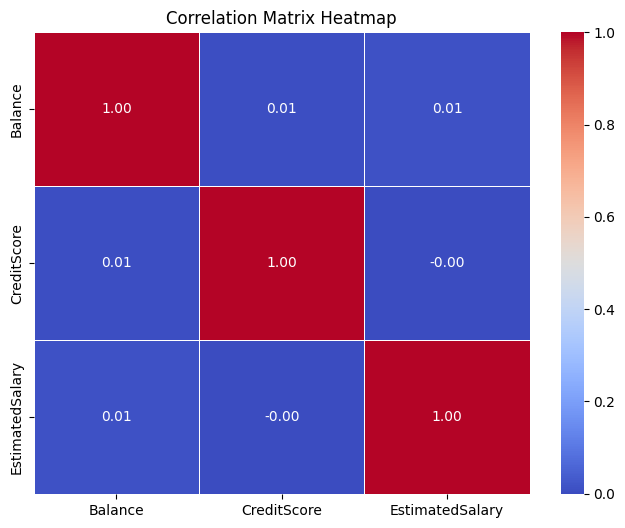

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


plt.title("Correlation Matrix Heatmap")
plt.show()


In [38]:
print(df[['Balance', 'EstimatedSalary']].describe())


             Balance  EstimatedSalary
count   10000.000000     10000.000000
mean    76485.889288    100090.239881
std     62397.405202     57510.492818
min         0.000000        11.580000
25%         0.000000     51002.110000
50%     97198.540000    100193.915000
75%    127644.240000    149388.247500
max    250898.090000    199992.480000


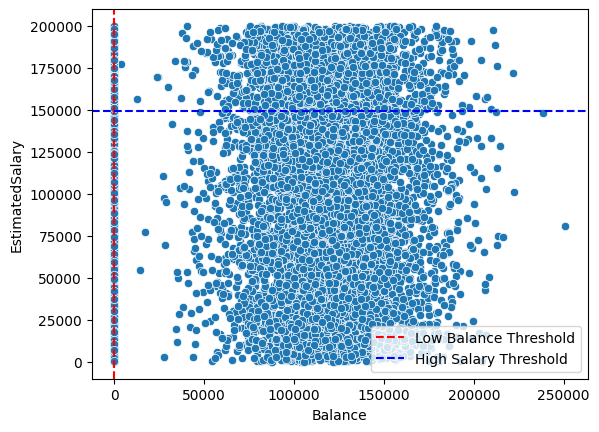

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['Balance'], y=df['EstimatedSalary'])
plt.axvline(df['Balance'].quantile(0.25), color='red', linestyle='dashed', label="Low Balance Threshold")
plt.axhline(df['EstimatedSalary'].quantile(0.75), color='blue', linestyle='dashed', label="High Salary Threshold")
plt.legend()
plt.show()


In [82]:
print(df['Balance'].describe())

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64


In [84]:
print(df['EstimatedSalary'].describe())

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


In [83]:

low_balance_threshold = df['Balance'].quantile(0.40)
low_balance = df['Balance'] < low_balance_threshold

high_salary_threshold = df['EstimatedSalary'].quantile(0.60)
high_salary = df['EstimatedSalary'] > high_salary_threshold

probability = np.mean(low_balance & high_salary)

print("Updated Probability of Low Balance & High Estimated Salary:", probability)

print("Customers with Low Balance:", low_balance.sum())
print("Customers with High Estimated Salary:", high_salary.sum())
print("Customers with Both Conditions:", (low_balance & high_salary).sum())


Updated Probability of Low Balance & High Estimated Salary: 0.1566
Customers with Low Balance: 4000
Customers with High Estimated Salary: 4000
Customers with Both Conditions: 1566


5. What are the differences in balance and transaction activity between customers who stayed and those who churned?


Balance Statistics:
                 mean     median           std
Exited                                       
0       72742.750663   92063.06  62851.577108
1       91109.476006  109344.23  58346.483197

Transaction Count Statistics:
                  mean      median           std
Exited                                         
0        99726.853141   99620.355  57399.956717
1       101509.908783  102489.335  57932.623392


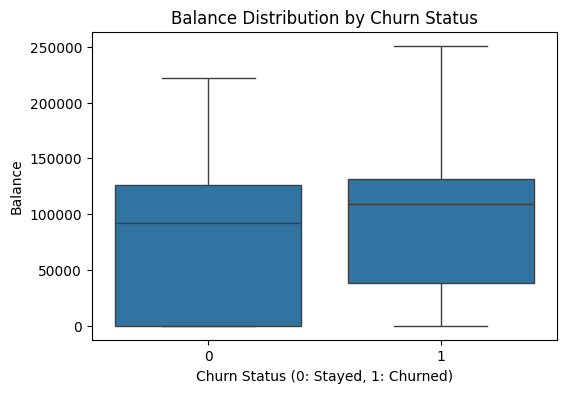

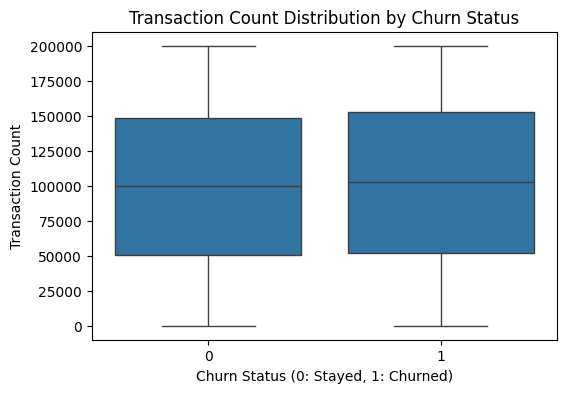

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


churn_groups = df.groupby('Exited')

balance_stats = churn_groups['Balance'].agg(['mean', 'median', 'std'])
transaction_stats = churn_groups['EstimatedSalary'].agg(['mean', 'median', 'std'])

print("Balance Statistics:\n", balance_stats)
print("\nTransaction Count Statistics:\n", transaction_stats)


plt.figure(figsize=(6, 4))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Churn Status (0: Stayed, 1: Churned)')
plt.ylabel('Balance')
plt.show()


plt.figure(figsize=(6, 4))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Transaction Count Distribution by Churn Status')
plt.xlabel('Churn Status (0: Stayed, 1: Churned)')
plt.ylabel('Transaction Count')
plt.show()

7. What is the probability that a customer has both a low credit score and a high balance?


In [81]:
credit_score_median = df['CreditScore'].median()
balance_median = df['Balance'].median()

low_credit_high_balance = df[(df['CreditScore'] < credit_score_median) & (df['Balance'] > balance_median)]

probability = len(low_credit_high_balance) / len(df)

print(f"The probability that a customer has both a low credit score and a high balance is: {probability:.4f}")

The probability that a customer has both a low credit score and a high balance is: 0.2478
